# Inspection of TensorFlows Image functionalities

This notebook aims to visualize the effects of TensorFlows possibilities to process images. 

In [1]:
import os
import numpy as np
import PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

## Define paths

In [2]:
# Get current absolute path parent folder of this file
path = os.path.dirname(os.path.abspath('tf-image-inspection'))

# Get path of parent directory, i.e. path to repo
path_repo = os.path.abspath(os.path.join(path, os.pardir))

# Set path to test image
path_img = os.path.join(path_repo, 'images/EURASIAN COLLARED DOVE/')
img_name = 'test.jpg'

## Plot original image

Image shape: (1024, 683)


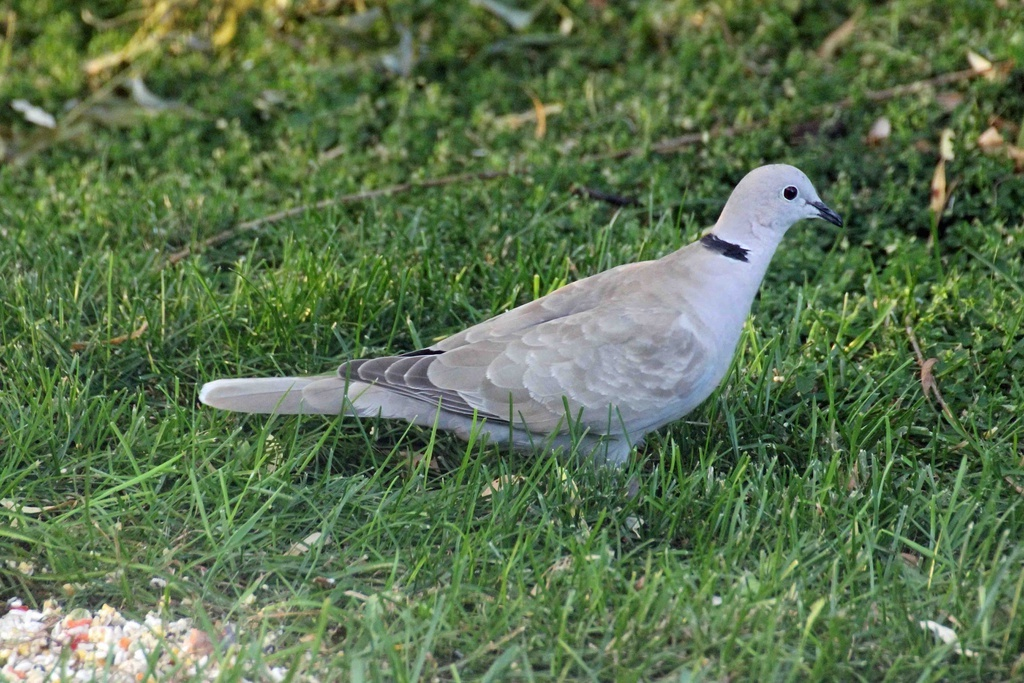

In [3]:
img1 = PIL.Image.open(path_img+img_name)
print(f"Image shape: {img1.size}")
img1

## Load image with 

### **tf.keras.utils.image_dataset_from_directory**

https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

In [4]:
# Import data
img_tf_0 = tf.keras.utils.image_dataset_from_directory(path_repo+'/images',
                batch_size = None, # as we have only one image
                color_mode='rgb', # default
                #image_size = (IMG_HEIGHT, IMG_WIDTH),
                #crop_to_aspect_ratio=True
                )

Found 1 files belonging to 1 classes.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-03 09:49:16.337470: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-03 09:49:16.337648: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Investigate object

---

When loading the test file with **tf.keras.utils.image_dataset_from_directory** we get variable `img_tf_0` which is a **ShuffleDataset** object 

In [5]:
type(img_tf_0)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

Let's see what we can do with this object:

In [6]:
# We can obtain the class name:
img_tf_0.class_names

['EURASIAN COLLARED DOVE']

In [7]:
# Assign label to a variable
class_names = img_tf_0.class_names

In [8]:
# Get path to files as list:
img_tf_0.file_paths

['/Users/philipp/neuefische/ds-capstone-for-the-birds/images/EURASIAN COLLARED DOVE/test.jpg']

In [9]:
# Define function to plot image imported with 'tf.keras.utils.image_dataset_from_directory'

def plot_fun(train_ds, save=False):
# train_ds is variable assigned by tf.keras.utils.image_dataset_from_directory
    for images, labels in train_ds.take(1):
        img_data = images
        label = labels

        # convert tensor object to numpy
        img_np = img_data.numpy().astype('uint8')
        plt.imshow(img_np)
        plt.title(class_names[label.numpy().argmax()]);

        print("Image shape: ", img_data.numpy().shape)
        print("Label: ", class_names[label.numpy().argmax()])

        if save==True:
            plt.savefig('test_image.png', dpi=300)

Image shape:  (256, 256, 3)
Label:  EURASIAN COLLARED DOVE


2022-11-03 09:49:16.569218: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


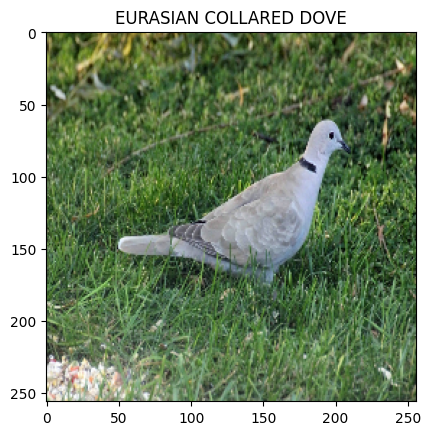

In [10]:
plot_fun(img_tf_0)

Let's review the import setting to get this image:

````
# Import data
img_tf_0 = tf.keras.utils.image_dataset_from_directory(path_repo+'/images',
                batch_size = None, # as we have only one image
                color_mode='rgb', # default
                #image_size = (IMG_HEIGHT, IMG_WIDTH),
                #crop_to_aspect_ratio=True
                )


The image has been reshaped to (256, 256) as these are the default values. As the original has a shape of (1024, 683) this image is distorted, i.d. compressed.

## Explore parameters

### - **color_mode**

Here, we can choose between 'rgb', 'grayscale' and 'rgba'

Found 1 files belonging to 1 classes.
Image shape:  (256, 256, 1)
Label:  EURASIAN COLLARED DOVE


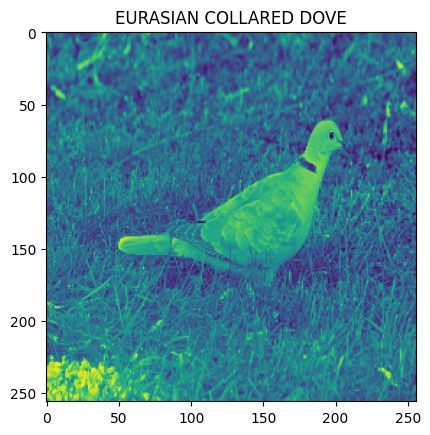

In [11]:
# Import data
img_tf_1 = tf.keras.utils.image_dataset_from_directory(path_repo+'/images',
                batch_size = None, # as we have only one image
                color_mode='grayscale', # default
                #image_size = (IMG_HEIGHT, IMG_WIDTH),
                #crop_to_aspect_ratio=True
                )

# Visualize image
plot_fun(img_tf_1)

Choosing color_mode='rgba' leads to an error:

InvalidArgumentError: JPEG does not support 4 channels

### - **image_size**

Found 1 files belonging to 1 classes.
Image shape:  (500, 1500, 3)
Label:  EURASIAN COLLARED DOVE


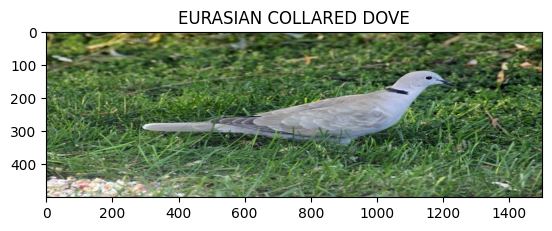

In [12]:
IMG_HEIGHT=500
IMG_WIDTH=1500

# Import data
img_tf_2 = tf.keras.utils.image_dataset_from_directory(path_repo+'/images',
                batch_size = None, # as we have only one image
                color_mode='rgb', # default
                image_size = (IMG_HEIGHT, IMG_WIDTH),
                #crop_to_aspect_ratio=True
                )

# Visualize image
plot_fun(img_tf_2)

We can set arbitrary values for image height and width, the image will be compressed or stretched accordingly.

### - **crop_to_aspect_ratio**

Let's now see what happens, if we force to keep the aspect ratio.

Found 1 files belonging to 1 classes.
Image shape:  (500, 1500, 3)
Label:  EURASIAN COLLARED DOVE


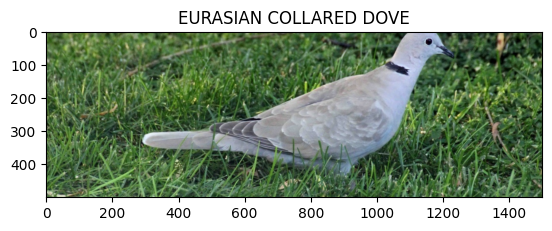

In [13]:
IMG_HEIGHT=500
IMG_WIDTH=1500

# Import data
img_tf_3 = tf.keras.utils.image_dataset_from_directory(path_repo+'/images',
                batch_size = None, # as we have only one image
                color_mode='rgb', # default
                image_size = (IMG_HEIGHT, IMG_WIDTH),
                crop_to_aspect_ratio=True
                )

# Visualize image
plot_fun(img_tf_3)

For better comparison, lets see the original, again:

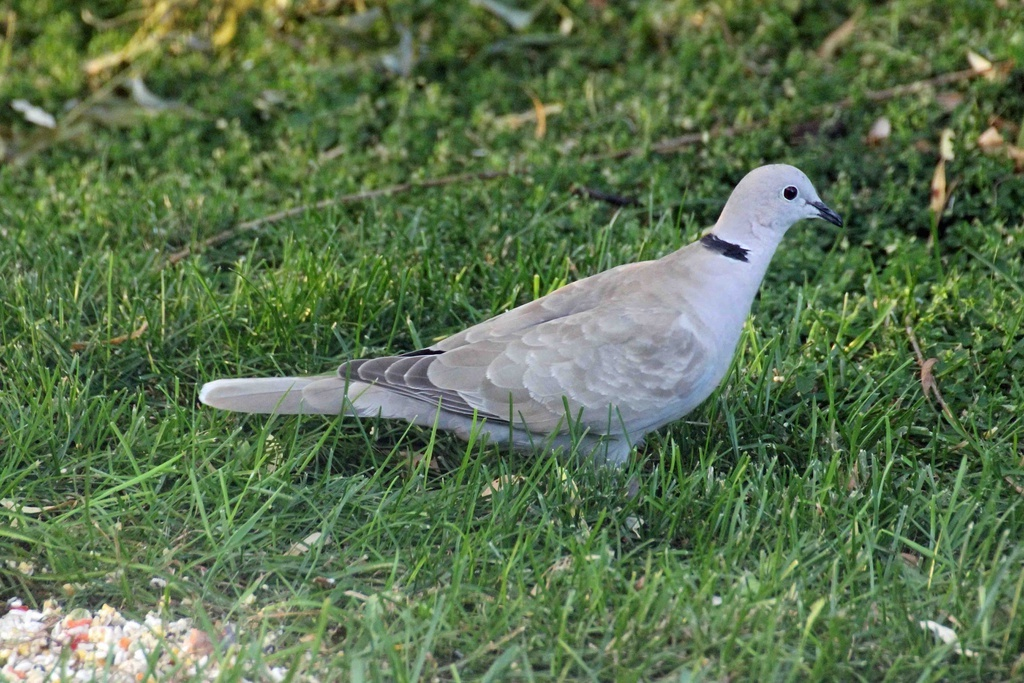

In [14]:
img1

As we can see, there is no distortion at all, the aspect ratio is preserved. Furthermore, we see:
- it is cropped centered both horizontally and vertically
- some interpolation takes place:
    - we resized it to (1500, 500) although the original image has only a resolution of (1024, 683)

### - **interpolation**

According to docs:

"String, the interpolation method used when resizing images. Defaults to **bilinear**. Supports **bilinear**, **nearest**, **bicubic**, **area**, **lanczos3**, **lanczos5**, **gaussian**, **mitchellcubic**" 

Found 1 files belonging to 1 classes.
Image shape:  (1500, 1500, 3)
Label:  EURASIAN COLLARED DOVE


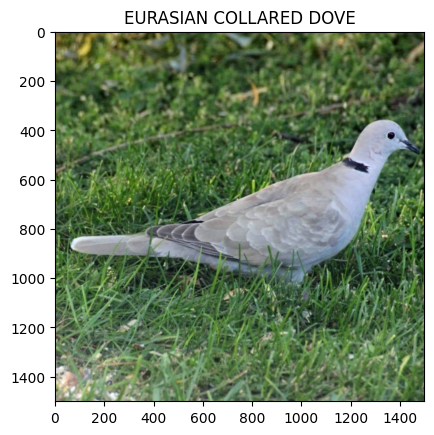

In [15]:
IMG_HEIGHT=1500
IMG_WIDTH=1500

# Import data
img_tf_4 = tf.keras.utils.image_dataset_from_directory(path_repo+'/images',
                batch_size = None, # as we have only one image
                color_mode='rgb', # default
                image_size = (IMG_HEIGHT, IMG_WIDTH),
                crop_to_aspect_ratio=True,
                interpolation='gaussian'
                )

# Visualize image
plot_fun(img_tf_4)

Found 1 files belonging to 1 classes.
Image shape:  (300, 300, 3)
Label:  EURASIAN COLLARED DOVE


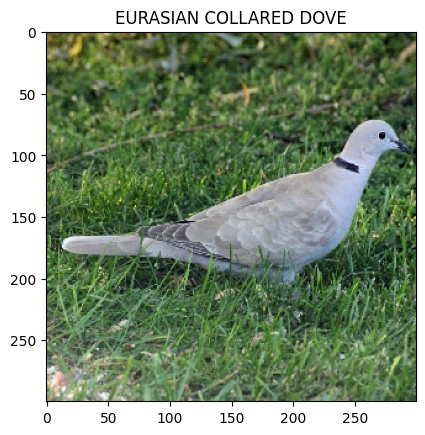

In [16]:
IMG_HEIGHT=300
IMG_WIDTH=300

# Import data
img_tf_5 = tf.keras.utils.image_dataset_from_directory(path_repo+'/images',
                batch_size = None, # as we have only one image
                color_mode='rgb', # default
                image_size = (IMG_HEIGHT, IMG_WIDTH),
                crop_to_aspect_ratio=True,
                interpolation='nearest'
                )

# Visualize image
plot_fun(img_tf_5)

## Process image with module

### **tf.image**

https://www.tensorflow.org/api_docs/python/tf/image

In [17]:
# TODO